<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Noer Ardiansyah Laksana // Data Science 3 Assigment</font></h1>

## Import Seluruh Package yang Dibutuhkan

In [20]:
! pip install sklearn.externals.six

ERROR: Could not find a version that satisfies the requirement sklearn.externals.six (from versions: none)
ERROR: No matching distribution found for sklearn.externals.six


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing # label encoder
from sklearn.neighbors import KNeighborsClassifier #Import knearest neighbors Classifier model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import sklearn.tree as tree #import visualizing decision tree
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model
from sklearn import svm #Import svm model
import seaborn as sns

## Load Dataset yang akan digunakan

In [22]:
df = pd.read_csv("./Datasets/bank-additional-full.csv", sep=';')
print('Data Sudah terbaca')

Data Sudah terbaca


In [23]:
# Meliat bentuk data
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.tail(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Melihat info dan bentuk data, serta melihat missing values yang ada di dalam data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak ada missing values yang ada pada datasets.

In [40]:
# Ganti Nama Kolom yang tidak relevan

df.rename(columns={"default":"credit"}, inplace=True)


In [41]:
df.head(2)

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Mengelompokan data berdasarkan tipenya

In [42]:
numerical_columns = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df.select_dtypes(include=['object']))

In [43]:
# Mengetahui jumlah "unknown" pada setiap atribut di kolom kategorikal

df[
    df[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
credit            0
education         0
marital           0
y                 0
dtype: int64

In [44]:
# Mengganti nilai unknown dengan NaN

df[
    df[categorical_columns]=="unknown"
] = np.nan

In [45]:
# Cek kembali apakah sudah terganti atau belum

df[
    df[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
credit            0
education         0
marital           0
y                 0
dtype: int64

Ok aman untuk kolom kategorikal

## Mulai Eksplorasi Data dengan Visualisasi

In [46]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

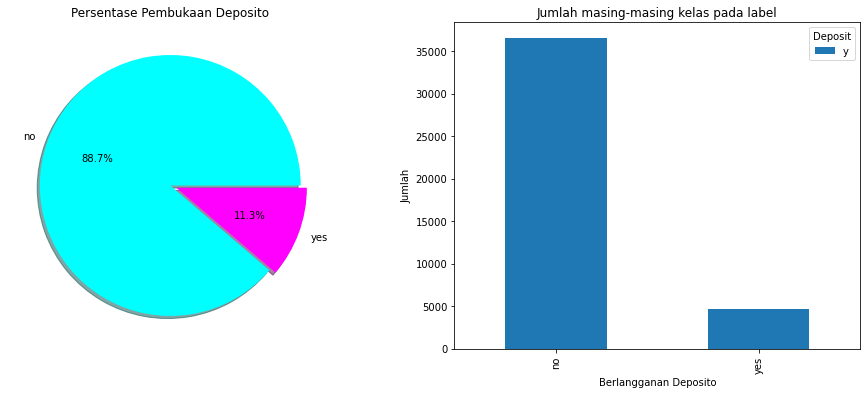

In [48]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "pembukaan deposito"
df['y'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='cool',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Pembukaan Deposito')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('y').agg({'y':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas pada label')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Berlangganan Deposito')
ax[1].legend(title='Deposit')

### --- Insight -- 

Terjadi imbalanced data dimana jumlah orang yang membukan deposito lebih sedikit dibandingkan jumlah orang yang tidak membuka deposito. Tentunya apabila terjadi hal seperti ini, akan mempengaruhi hasil dari pemodelan klasifikasi yang digunakan oleh machine learning. Oleh karena itu, mari kita eksplorasi lebih lanjut.

Text(0, 0.5, '')

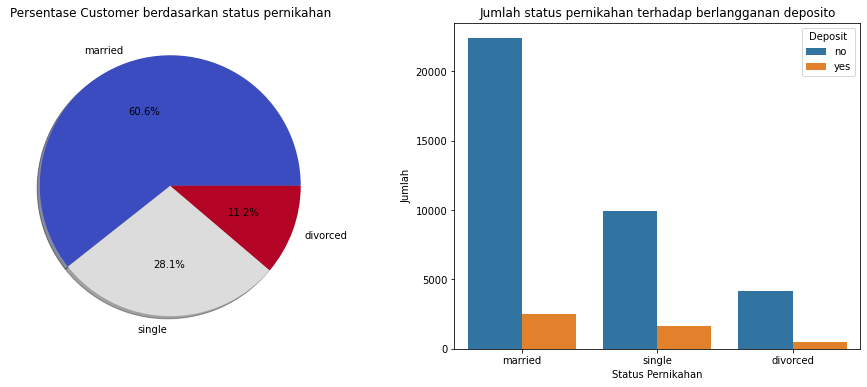

In [49]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# Barchart besaran setiap status pernikahan terhadap setiap kelas target
sns.countplot(
    x='marital',
    hue='y',
    data=df
)
ax[1].set_title('Jumlah status pernikahan terhadap berlangganan deposito')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Status Pernikahan')
ax[1].legend(title='Deposit')

# persentase "marital"
df['marital'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%', 
    cmap='coolwarm',
    shadow=True,
)
ax[0].set_title('Persentase Customer berdasarkan status pernikahan')
ax[0].set_ylabel('')



Terlihat dari grafik diatas, bahwa status pernikahan dengan status menikah menjadi nasabah dominasi yang memberikan data yang palinng besar

In [50]:
# creating labelEncoder
le = preprocessing.LabelEncoder()

# convert text to numerical category
df[['job','marital','education','credit','housing','loan','contact','month','day_of_week',
         'poutcome','y']] = df[['job','marital','education','credit','housing','loan','contact','month','day_of_week',
         'poutcome','y']].apply(le.fit_transform)

### Data Processing

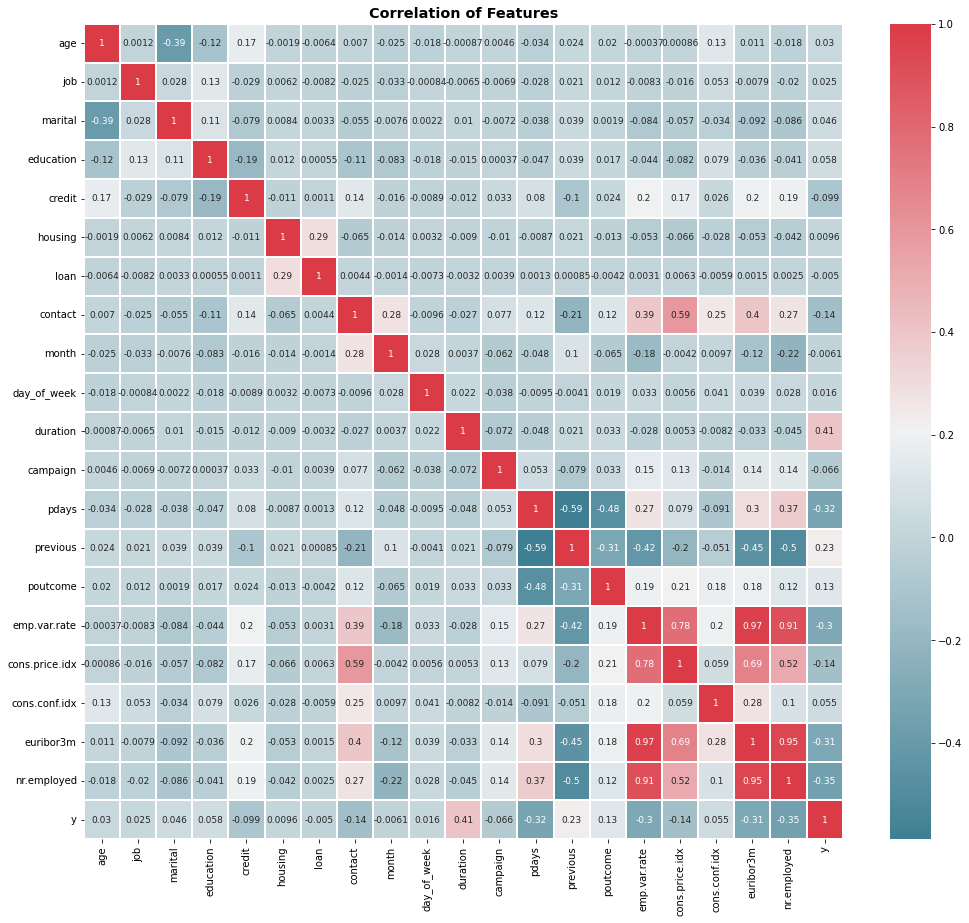

In [51]:
plt.figure(figsize=(17, 15))
plt.title('Correlation of Features', fontsize='x-large', fontweight='bold')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap, linewidths=.1, annot_kws={'size': 9})
plt.show()

Terlihat pada heatmap diatas, ada beberapa warna yang ditampilkan warna tersebut mengindikasikan korelasi antar data atau kolom. Semakin merah menyatakan korelasi positif, dan semakin biru menyatakan korelasi negatif.

## Split Data

Sebagaimana standar yang digunakan, maka kita akan membagi data menjadi 70:30 untuk training dan testing.

In [55]:
x = df.drop('y', 1)
y = df.y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

Training set size: (28831, 20)
Test set size: (12357, 20)


C:\Users\user\AppData\Local\Temp/ipykernel_9012/1982221407.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop('y', 1)


### Scaling Data

In [56]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

display(x_test_scaled)

array([[-1.15206928,  1.18809454,  1.3550039 , ...,  1.96712956,
        -1.60640066, -1.25436496],
       [ 0.8598069 ,  1.74448587, -0.28525799, ..., -0.06162128,
        -1.35122935, -1.25436496],
       [-0.28983663,  0.90989888, -1.92551988, ...,  0.88800678,
         0.71606148,  0.33454248],
       ...,
       [ 2.48846857,  0.35350755, -0.28525799, ...,  0.65059976,
        -1.57414424, -2.81282296],
       [ 1.24302141, -0.7592751 , -0.28525799, ...,  0.88800678,
         0.71606148,  0.33454248],
       [-0.67305114, -0.7592751 , -1.92551988, ...,  0.88800678,
         0.71548548,  0.33454248]])

# 1. Logistic Regression

In [58]:
model_LR = LogisticRegression(solver='liblinear', random_state=11)
model_LR.fit(x_train_scaled, y_train)
y_pred_LR = model_LR.predict(x_test_scaled)

print(classification_report(y_test, y_pred_LR), end='')

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10958
           1       0.69      0.42      0.52      1399

    accuracy                           0.91     12357
   macro avg       0.81      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357


In [61]:
print('Nilai akurasi pembuatan model menggunakan data training (satuann persen) adalah', model_LR.score(x_train, y_train) * 100)
print('Nilai akurasi pembuatan model menggunakan data testing (satuan persen) adalah', model_LR.score(x_test, y_test) *100)

Nilai akurasi pembuatan model menggunakan data training (satuann persen) adalah 88.75515937705941
Nilai akurasi pembuatan model menggunakan data testing (satuan persen) adalah 88.6784818321599


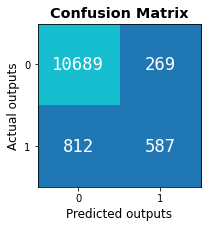

In [62]:
def cmplot(cm):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cm, cmap='tab10')
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize='large')
    ax.set_ylabel('Actual outputs', fontsize='large')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white', 
                    fontsize='xx-large', fontfamily='monospace')
    plt.title('Confusion Matrix', fontsize='x-large', fontweight='bold')
    plt.show()

cmplot(confusion_matrix(y_test, y_pred_LR))

--- Insight ---

Pada matriks diatas ada beberapa informasi yang didepan yaitu : 
1. True Positive (TP) : Ada 587 hasil prediksi yang benar bahwa customer akan melakukan pembukaan deposito
2. Negative Positive (NP) : Ada 10689 hasil prediksi yang benar bhawa customer tidak akan membukan deposito
3. Fasle Positive (FP) : Ada 289 hasil prediksi yang salah bahwa customer akan membuka rekening deposito
4. False Negative (FN) : Ada 812 hasil prediksi yang salah bahwa customer tidak akan membuka rekening deposito

# 2. K-Nearest Neighbors

In [78]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

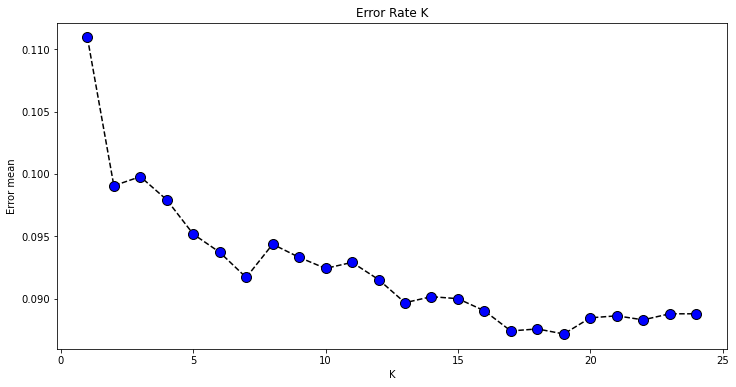

In [80]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), error, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [81]:
knn = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_pred1 = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1) *100)

Accuracy: 91.00105203528365


# 3. Naive Bayes

In [64]:
model_GNB = GaussianNB()
model_GNB.fit(x_train_scaled, y_train)
y_pred_GNB = model_GNB.predict(x_test_scaled)

print(classification_report(y_test, y_pred_GNB), end='')

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10958
           1       0.38      0.59      0.46      1399

    accuracy                           0.85     12357
   macro avg       0.66      0.73      0.69     12357
weighted avg       0.88      0.85      0.86     12357


In [65]:
print('Nilai akurasi pembuatan model naive bayes menggunakan data training (satuann persen) adalah', model_GNB.score(x_train_scaled, y_train) * 100)
print('Nilai akurasi pembuatan model naive bayes menggunakan data Uji (satuann persen) adalah', model_GNB.score(x_test_scaled, y_test)* 100)

Nilai akurasi pembuatan model naive bayes menggunakan data training (satuann persen) adalah 84.69355901633658
Nilai akurasi pembuatan model naive bayes menggunakan data Uji (satuann persen) adalah 84.56745164683986


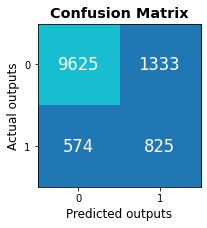

In [66]:
cmplot(confusion_matrix(y_test, y_pred_GNB))

--- Insight ---

Pada matriks diatas ada beberapa informasi yang didepan yaitu : 
1. True Positive (TP) : Ada 825 hasil prediksi yang benar bahwa customer akan melakukan pembukaan deposito
2. Negative Positive (NP) : Ada 9625 hasil prediksi yang benar bhawa customer tidak akan membukan deposito
3. Fasle Positive (FP) : Ada 1333 hasil prediksi yang salah bahwa customer akan membuka rekening deposito
4. False Negative (FN) : Ada 574 hasil prediksi yang salah bahwa customer tidak akan membuka rekening deposito

# 4. Decission Tree

In [68]:
feature_cols = list(df[df.columns[:-1]])

In [69]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred3 = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3) *100)

Accuracy: 90.6368859755604


In [87]:
dot_data = StringIO()
tree.export_graphviz(
    clf, 
    out_file=dot_data, 
    class_names=['0','1'], 
    feature_names=list(x_train.columns), 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

AttributeError: 'SVC' object has no attribute 'n_features_'

# 5. Random Forest

In [71]:
model_RF = RandomForestClassifier(random_state=11)
model_RF.fit(x_train_scaled, y_train)
y_pred_RF = model_RF.predict(x_test_scaled)

print(classification_report(y_test, y_pred_RF), end='')

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10958
           1       0.64      0.48      0.55      1399

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357


In [72]:
print('Nilai akurasi pembuatan model random forest menggunakan data training (satuann persen) adalah', model_RF.score(x_train_scaled, y_train) * 100)
print('Nilai akurasi pembuatan model random forest menggunakan data Uji (satuann persen) adalah', model_RF.score(x_test_scaled, y_test)* 100)

Nilai akurasi pembuatan model random forest menggunakan data training (satuann persen) adalah 100.0
Nilai akurasi pembuatan model random forest menggunakan data Uji (satuann persen) adalah 91.05770008901837


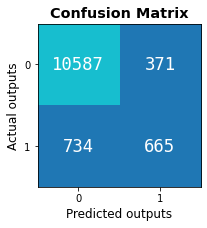

In [73]:
cmplot(confusion_matrix(y_test, y_pred_RF))

--- Insight ---

Pada matriks diatas ada beberapa informasi yang didepan yaitu : 
1. True Positive (TP) : Ada 665 hasil prediksi yang benar bahwa customer akan melakukan pembukaan deposito
2. Negative Positive (NP) : Ada 10587 hasil prediksi yang benar bhawa customer tidak akan membukan deposito
3. Fasle Positive (FP) : Ada 371 hasil prediksi yang salah bahwa customer akan membuka rekening deposito
4. False Negative (FN) : Ada 734 hasil prediksi yang salah bahwa customer tidak akan membuka rekening deposito

# 6. Support Vector Machine

In [75]:
# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(x_train, y_train) 

# Predict the response for test dataset
y_pred5 = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5) *100)

Accuracy: 89.90855385611395


In [77]:
# Check precision and recall model
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred5) *100) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred5) *100)

Precision: 56.540447504302925
Recall: 46.96211579699786


# Overall Analysis

In [82]:
print("Logistic Regression:", model_LR.score(x_test, y_test) *100)
print("Decision Tree:", metrics.accuracy_score(y_test, y_pred3) *100)
print("Random Forest:", model_RF.score(x_test_scaled, y_test)* 100)
print("SVM:", metrics.accuracy_score(y_test, y_pred5) *100)
print("Naive Bayes:", model_GNB.score(x_test_scaled, y_test)* 100)
print("KNN:", metrics.accuracy_score(y_test, y_pred1) *100)

Logistic Regression: 88.6784818321599
Decision Tree: 90.6368859755604
Random Forest: 91.05770008901837
SVM: 89.90855385611395
Naive Bayes: 84.56745164683986
KNN: 91.00105203528365


Dari hasil uji dataset dengan menggunakan beberapa metode, dapat terlihat bahwa metode random forest menunjukan hasil kinerja yang cukup memuaskan dengan hasil akurasi paling besar diantara yang lain. Selain itu, dalam tahap uji coba metode ini juga menjadi metode yang paling ringan terhadap gawai ketika melakukan proses pengolahan data.